# **Instacart Basket Analysis 2024 - Part 3**

## **This Script Contains the Following Points**
#### 1. Importing Libraries & Data
#### 2. Additional Visualizations for Instacart

### 1. Importing Libraries & Data

In [5]:
#import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#create folder path to Instacart dataset
path = r'/Users/kimkmiz/Documents/Instacart Basket Analysis 2024'

#importing Instacart dataset from part one
df = pd.read_pickle(os.path.join(path, '02 Data', 'IC24 Prepared Data', 'instacart_full_data.pkl'))

In [6]:
df.head(5)

,user_id,Gender,STATE,Age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,customer_activity_flag,age_group,income_level,dependants_status,department,pet_owner,parent_of_baby,goods_category,shopping_time_category,profile
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,High Activity,Middle Age,High Income,has dependants,beverages,0,0,Purchases,Weekday Shopper,"Middle Age, High Income, Purchases, has depend..."
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,High Activity,Middle Age,High Income,has dependants,beverages,0,0,Purchases,Weekend/Evening Shopper,"Middle Age, High Income, Purchases, has depend..."
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,High Activity,Middle Age,High Income,has dependants,beverages,0,0,Purchases,Weekday Shopper,"Middle Age, High Income, Purchases, has depend..."
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,High Activity,Middle Age,High Income,has dependants,produce,0,0,Purchases,Weekday Shopper,"Middle Age, High Income, Purchases, has depend..."
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,High Activity,Middle Age,High Income,has dependants,produce,0,0,Purchases,Weekday Shopper,"Middle Age, High Income, Purchases, has depend..."


### 2. Additional Visualizations for Instacart

In [8]:
df['order_hour_of_day'].value_counts().sort_index()

order_hour_of_day
0      218769
1      115700
2       69375
3       51281
4       53242
5       87961
6      290493
7      891054
8     1718118
9     2454203
10    2761760
11    2736140
12    2618532
13    2660954
14    2689136
15    2662144
16    2535202
17    2087654
18    1636502
19    1258305
20     976156
21     795637
22     634225
23     402316
Name: count, dtype: int64

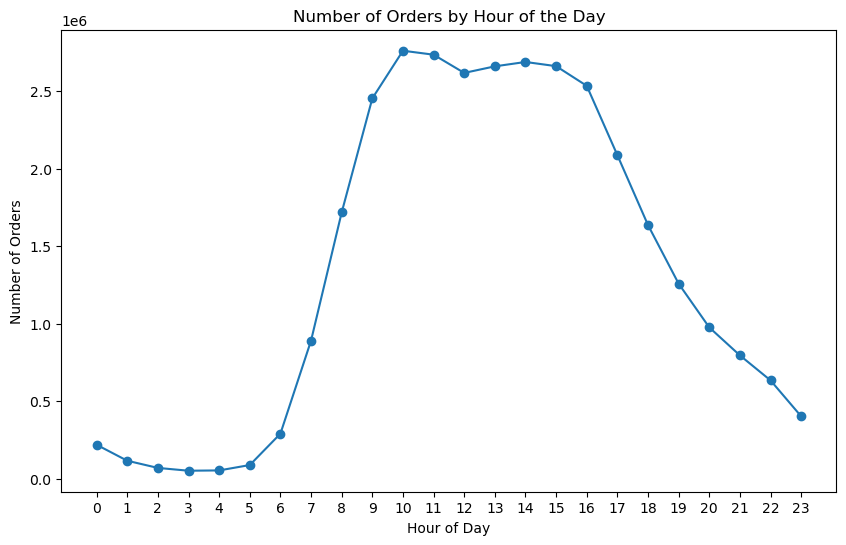

In [9]:
#Calculate the number of orders per hour
hourly_order_counts = df['order_hour_of_day'].value_counts().sort_index()

# Plotting
orders_by_hour_line = plt.figure(figsize=(10, 6))
plt.plot(hourly_order_counts.index, hourly_order_counts.values, marker='o')
plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))  
plt.show()

In [10]:
#export chart
orders_by_hour_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_by_hour_line.png'))

In [11]:
df['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

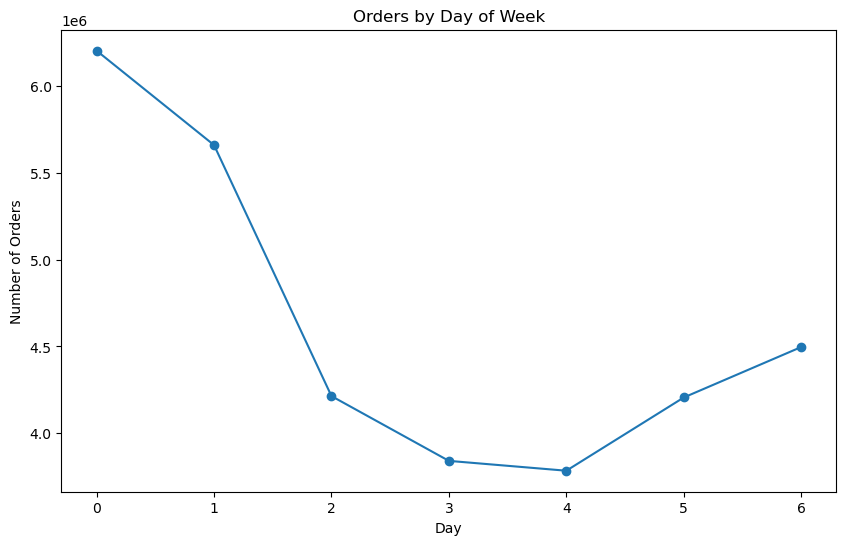

In [12]:
#Calculate the number of orders per day
daily_order_counts = df['order_day_of_week'].value_counts().sort_index()

# Plotting
orders_per_day_line = plt.figure(figsize=(10, 6))
plt.plot(daily_order_counts.index, daily_order_counts.values, marker='o')
plt.title('Orders by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.xticks(range(7))  
plt.show()

In [13]:
#export chart
orders_per_day_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_per_day_line.png'))

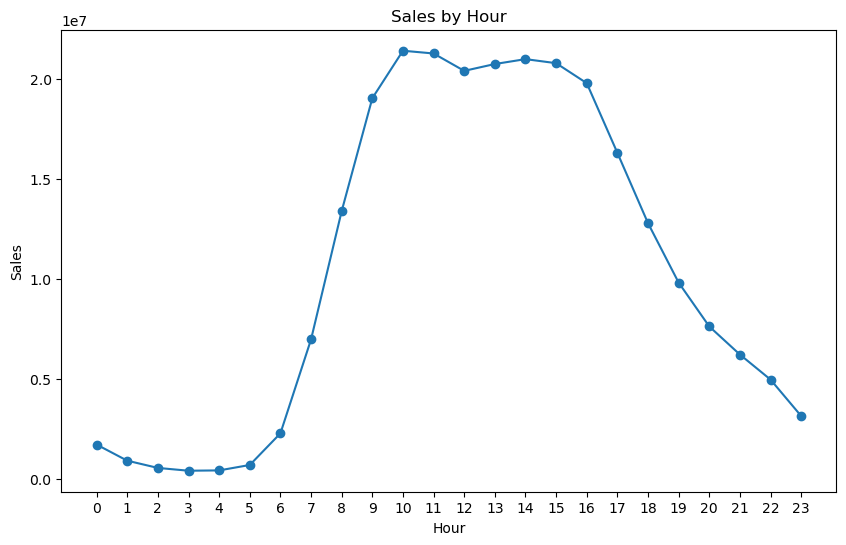

In [14]:
# Grouping by 'order_hour_of_day' and calculating the sum of 'prices'
hourly_price_sum = df.groupby('order_hour_of_day')['prices'].sum()

# Plotting
hourly_price_sum_line=plt.figure(figsize=(10, 6))
plt.plot(hourly_price_sum.index, hourly_price_sum.values, marker='o')
plt.title('Sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.xticks(range(24))  # This ensures all 24 hours are labeled on the x-axis
plt.show()

In [15]:
#export chart
hourly_price_sum_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hourly_price_sum_line.png'))

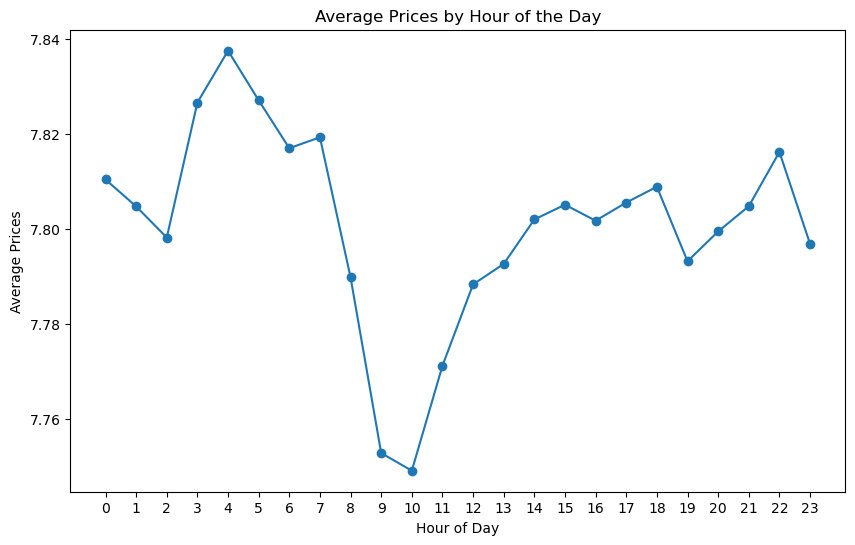

In [16]:
# Grouping by 'order_hour_of_day' and calculating the average of 'prices'
hourly_price_avg = df.groupby('order_hour_of_day')['prices'].mean()

# Plotting
hourly_price_avg_line= plt.figure(figsize=(10, 6))
plt.plot(hourly_price_avg.index, hourly_price_avg.values, marker='o')
plt.title('Average Prices by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Prices')
plt.xticks(range(24))  
plt.show()


In [17]:
#export chart
hourly_price_avg_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hourly_price_avg_line.png'))

<Axes: xlabel='department'>

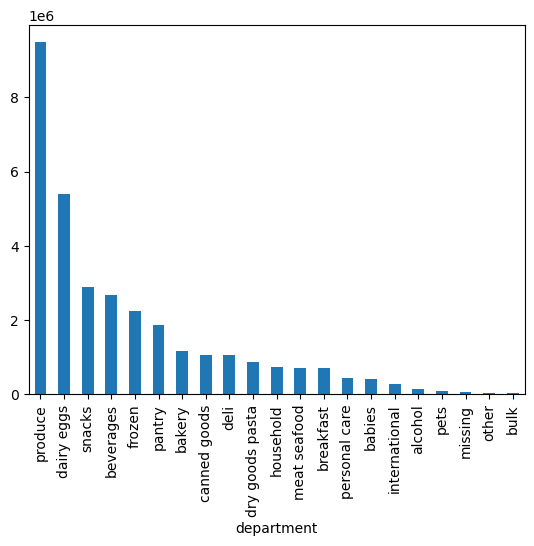

In [18]:
#create bar chart of department sales
df['department'].value_counts().plot.bar()

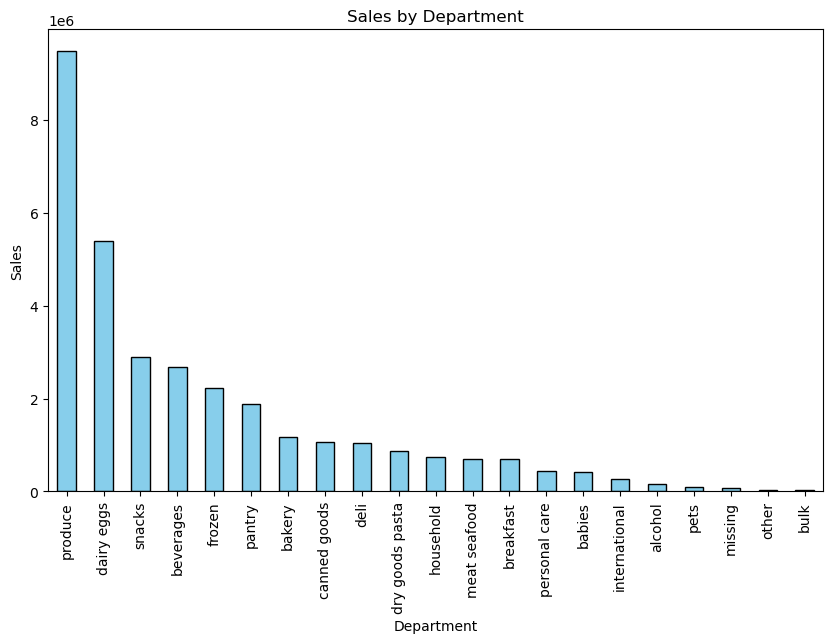

In [19]:
# Customizing the bar chart
df['department'].value_counts().plot.bar(color='skyblue', edgecolor='black')

# Adding a title
departments_sales_bar = plt.title('Sales by Department')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.gcf().set_size_inches(10, 6)
plt.show()

In [20]:
#export chart
departments_sales_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','departments_sales_bar.png'))

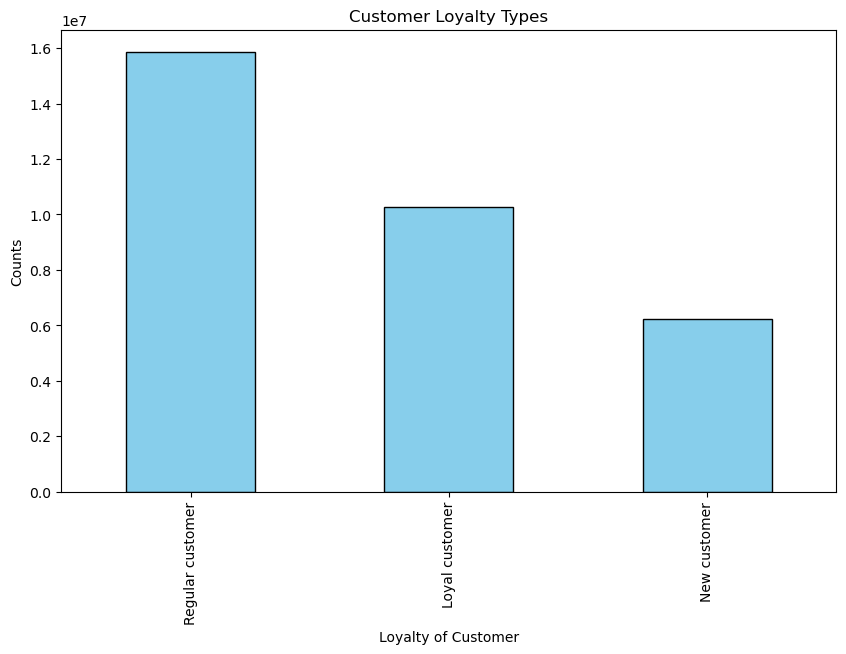

In [21]:
df['loyalty_flag'].value_counts().plot.bar(color='skyblue', edgecolor='black')
departments_sales_bar = plt.title('Customer Loyalty Types')
plt.xlabel('Loyalty of Customer')
plt.ylabel('Counts')
plt.gcf().set_size_inches(10, 6)
plt.show()

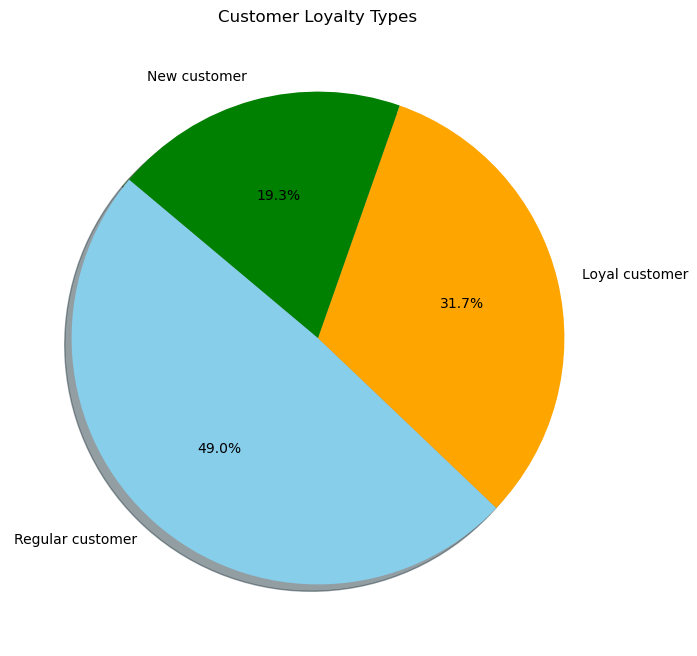

In [22]:
# Create pie chart of loyalty flag distribution
loyalty_pie = df['loyalty_flag'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Display percentage on pie slices
    colors=['skyblue', 'orange', 'green'],  # Optional: colors for the slices
    startangle=140,  # Start angle to better distribute slices
    shadow=True  # Adds a shadow for visual effect
)

# Adding a title
plt.title('Customer Loyalty Types')

# Adjusting figure size
plt.gcf().set_size_inches(8, 8)

# Displaying the plot
plt.ylabel('')  # Removing the y-axis label for a cleaner look in a pie chart
plt.show()

In [23]:
#export chart
loyalty_pie.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_pie.png'))

In [55]:
#compare  by income by marital status
#create crosstab
income_marital_crosstab=pd.crosstab(df['marital_status'], df['income_level'],dropna = False)

#print crosstab
income_marital_crosstab

income_level,High Income,Low Income,Middle Income
marital_status,,,
divorced/widowed,1018115,334734,1418963
living with parents and siblings,17872,636486,896245
married,5742492,5005253,12009008
single,935049,1544720,2845922


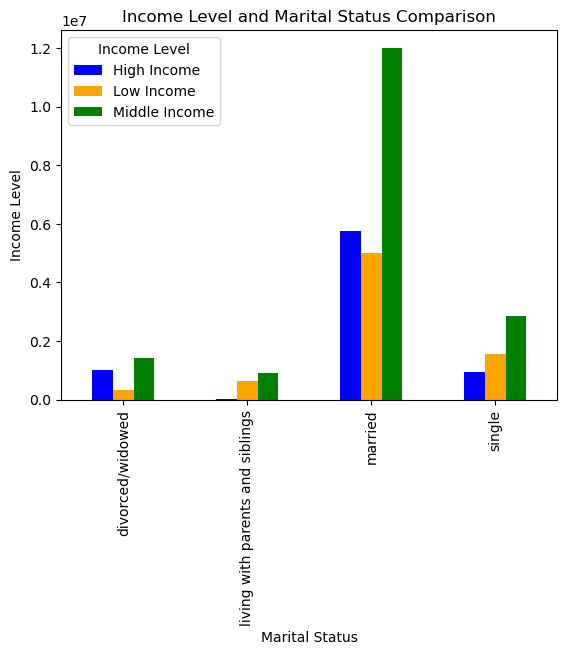

In [59]:
income_marital_bar=income_marital_crosstab.plot.bar(color=['blue','orange','green'])


plt.title('Income Level and Marital Status Comparison')
plt.xlabel('Marital Status')
plt.ylabel('Income Level')
plt.legend(title='Income Level')
plt.show()

In [61]:
#Export 
income_marital_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','income_marital_bar.png'))

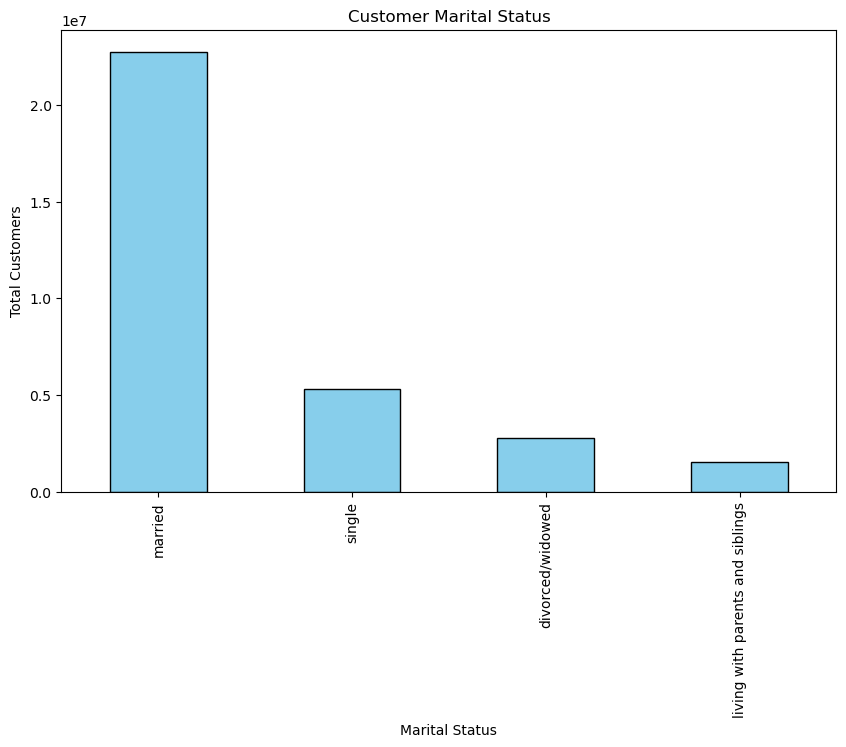

In [65]:
# Customizing the bar chart
customer_marital_status_bar=df['marital_status'].value_counts().plot.bar(color='skyblue', edgecolor='black')

# Adding a title
plt.title('Customer Marital Status')

# Adding labels
plt.xlabel('Marital Status')
plt.ylabel('Total Customers')

# Adjusting figure size
plt.gcf().set_size_inches(10, 6)

# Displaying the plot
plt.show()

In [67]:
#Export 
customer_marital_status_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','customer_marital_status_bar.png'))

In [69]:
#compare  by age by marital status
#create crosstab
age_marital_crosstab=pd.crosstab(df['marital_status'], df['age_group'],dropna = False)

#print crosstab
age_marital_crosstab

age_group,Middle Age,Senior,Young Adult
marital_status,,,
divorced/widowed,117221,2654591,0
living with parents and siblings,0,0,1550603
married,11424038,7928248,3404467
single,3681402,0,1644289


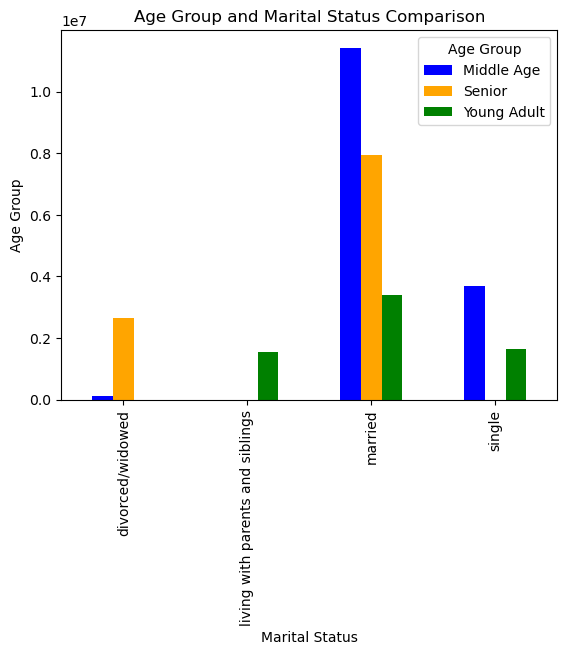

In [75]:
age_marital_bar=age_marital_crosstab.plot.bar(color=['blue','orange','green'])


plt.title('Age Group and Marital Status Comparison')
plt.xlabel('Marital Status')
plt.ylabel('Age Group')
plt.legend(title='Age Group')
plt.show()

In [77]:
#Export 
age_marital_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_marital_bar.png'))

In [79]:
#compare  by dependants by marital status
#create crosstab
dependants_marital_crosstab=pd.crosstab(df['marital_status'], df['dependants_status'],dropna = False)

#print crosstab
dependants_marital_crosstab


dependants_status,has dependants,no dependants
marital_status,,
divorced/widowed,0,2771812
living with parents and siblings,1550603,0
married,22756753,0
single,0,5325691


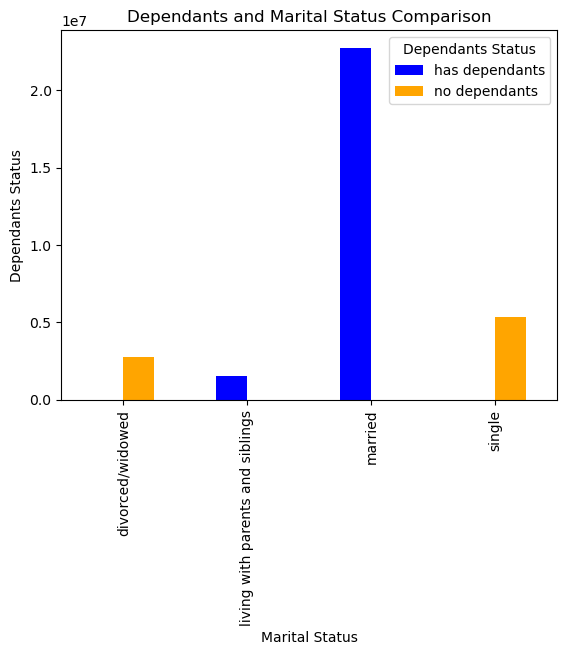

In [83]:
dependants_marital_bar=dependants_marital_crosstab.plot.bar(color=['blue','orange'])


plt.title('Dependants and Marital Status Comparison')
plt.xlabel('Marital Status')
plt.ylabel('Dependants Status')
plt.legend(title='Dependants Status')
plt.show()

In [85]:
#Export 
dependants_marital_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dependants_marital_bar.png'))